In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler


In [28]:
df = pd.read_csv("USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


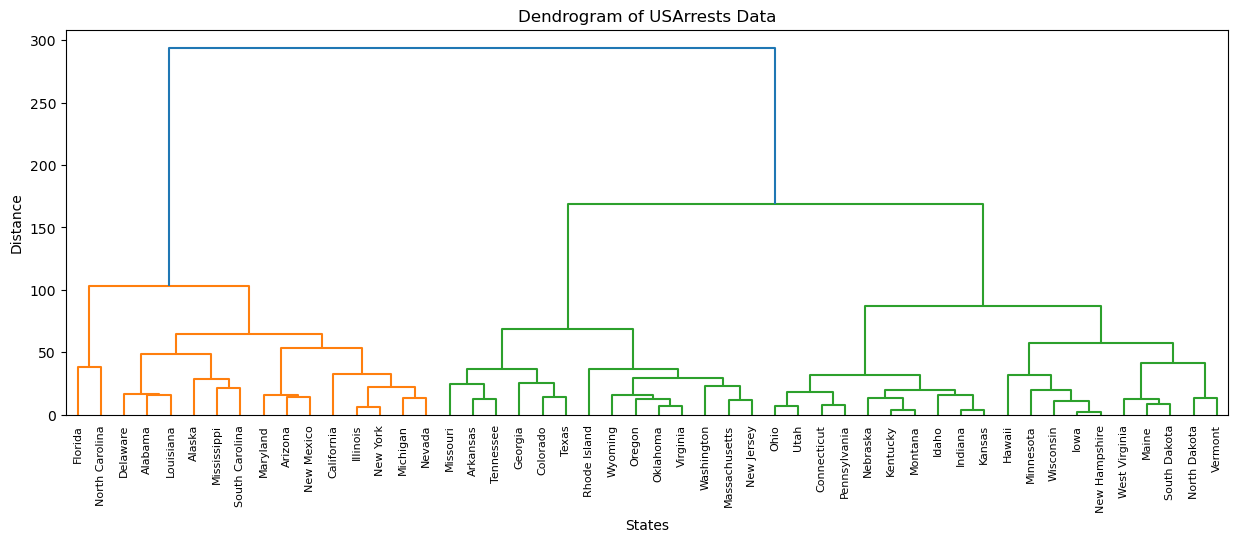

In [29]:
# (a) Hierarchical clustering
Z = linkage(df, method='complete', metric='euclidean')
plt.figure(figsize=(15, 5))
plt.title("Dendrogram of USArrests Data")
plt.xlabel("States")
plt.ylabel("Distance")
dendrogram(Z, labels=df.index, leaf_rotation=90)
plt.show()

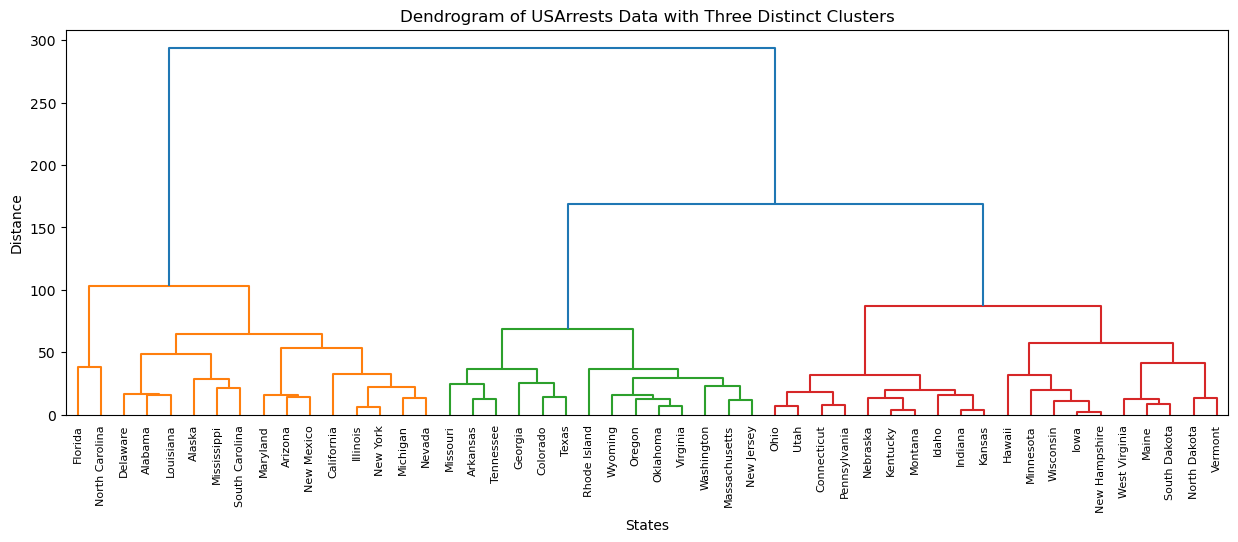

Cut at Height of clusters = 150
Cluster 1 : Alabama, Alaska, Arizona, California, Delaware, Florida, Illinois, Louisiana, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, North Carolina, South Carolina
Cluster 2 : Arkansas, Colorado, Georgia, Massachusetts, Missouri, New Jersey, Oklahoma, Oregon, Rhode Island, Tennessee, Texas, Virginia, Washington, Wyoming
Cluster 3 : Connecticut, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, Ohio, Pennsylvania, South Dakota, Utah, Vermont, West Virginia, Wisconsin


In [30]:
# (b) Cut the dendrogram at a height that results in three distinct clusters
plt.figure(figsize=(15, 5))
plt.title("Dendrogram of USArrests Data with Three Distinct Clusters")
plt.xlabel("States")
plt.ylabel("Distance")
dendrogram(Z, labels=df.index, leaf_rotation=90, color_threshold=150)
plt.show()

cut_height = 150
clusters = fcluster(Z, t=cut_height, criterion='distance')

# dic to display easy to see which states belong to which clusters
cluster_dict = {}
for state, cluster in zip(df.index, clusters):
    if cluster not in cluster_dict:
        cluster_dict[cluster] = [state]
    else:
        cluster_dict[cluster].append(state)

# Display the clusters
print("Cut at Height of clusters =", cut_height)
for cluster, states in cluster_dict.items():
    print(f"Cluster {cluster} : {', '.join(states)}")

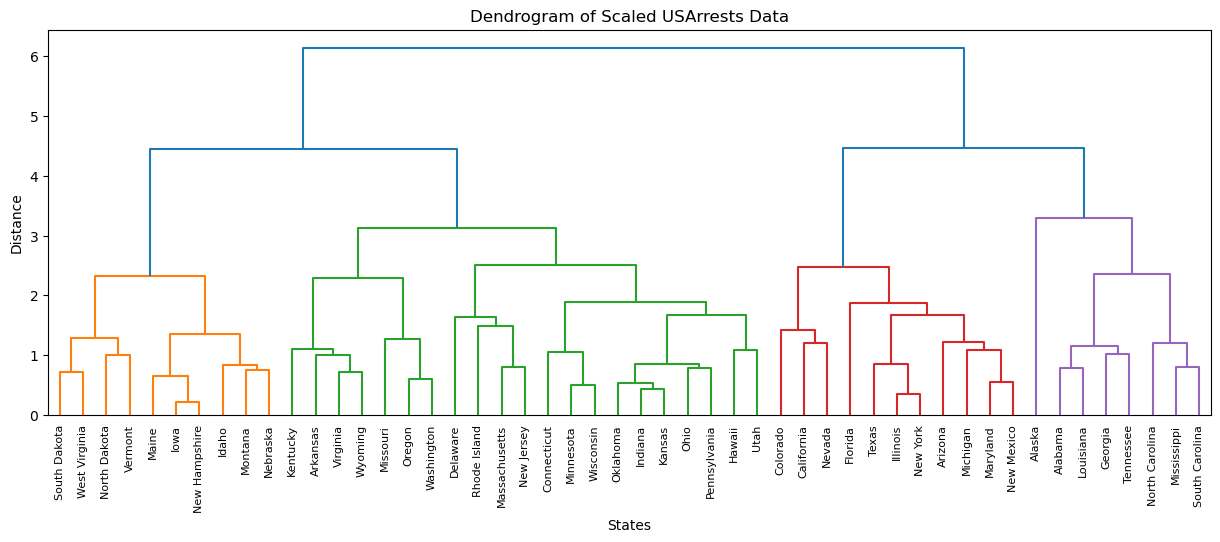

In [34]:
# (c)
df_scaled = pd.DataFrame(data=StandardScaler().fit_transform(df), columns=df.columns, index=df.index)
Z_scaled = linkage(df_scaled, method='complete', metric='euclidean')
plt.figure(figsize=(15, 5))
plt.title("Dendrogram of Scaled USArrests Data")
plt.xlabel("States")
plt.ylabel("Distance")
dendrogram(Z_scaled, labels=df.index, leaf_rotation=90)
plt.show()

(d)
Scaling이 hierarchical clustering에 미치는 영향은 관측치 간 거리에 어떤 영향을 미치는지에 명확하게 나타낸다. Scaling은 변수의 크기가 클 경우 군집화 과정에서 변수가 지배하는 것을 방지하여 모든 변수가 dissimilarity measure에 동등하게 기여하도록 보장한다. 때로는 변수가 서로 다른 단위나 순서를 가질 때 Scaling이 중요할 수 있다.
변수가 서로 다른 스케일을 가질 때 hierarchical clustering에서 inter-observation dissimilarities를 계산하기 전에 Scaling을 권장한다. 이는 linkage 알고리즘을 포함한 hierarchical clustering 방법이 변수의 크기에 민감하기 때문인데 scaling을 통해 군집화가 변수의 절대 스케일이 아닌 데이터의 패턴과 관계에 기반하도록 보장한다.
따라서, hierarchical clustering에서 inter-observation dissimilarities를 계산하기 전에 변수를 scaling하는 것이 일반적으로 권장되고, 이 방법을 통해 의미 있는 robust한 결과를 얻을 수 있다.